# Visualize generated scenarios

(from the `/llm/generate/scenario` endpoint)

## Demonstrate a generated scenario (`curl`)

In [1]:
# %%sh

# curl -X 'POST' \
#   'http://localhost:8001/llm/generate/scenario' \
#   -H 'accept: application/json' \
#   -H 'Content-Type: application/json' \
#   -d '{
#   "query": "A healthy patient."
# }'

## Generate using the `pfun-cma-model` CLI

In [2]:
# !pfun-cma-model generate-scenario

## Load the scenario

In [3]:
import json
from pathlib import Path
import pandas as pd

response_fpath = Path('../../results/generated-responses/response_1760175858463.json')

response_json = json.loads(response_fpath.read_text())

response_json

{'qualitative_description': 'This individual leads a very structured and healthy lifestyle, which contributes to excellent glycemic control. They maintain a balanced diet with consistent carbohydrate intake at each meal, engage in moderate physical activity daily, such as a brisk walk after dinner, and prioritize getting 7-8 hours of quality sleep each night. Their stress levels are low, and they live in a temperate climate with consistent daylight hours throughout the year. As a result, their blood glucose levels are generally stable and predictable.',
 'parameters': {'d': 0, 'taup': 1, 'taug': 1, 'B': 0.05, 'Cm': 0, 'toff': 0},
 'sample_solutions': [{'t': 0,
   'c': 0.0830452722,
   'm': 0.8535533906,
   'a': 0.2507233447,
   'I_S': 0.1529527985,
   'I_E': 0.0383488372,
   'L': 0,
   'g_0': 0.1,
   'g_1': 0.1,
   'g_2': 0.1,
   'G': 0.3,
   'is_meal': False},
  {'t': 1.0434782609,
   'c': 0.0380090513,
   'm': 0.9358301507,
   'a': 0.2539293579,
   'I_S': 0.0835026721,
   'I_E': 0.02

In [4]:
# Description

response_json["qualitative_description"]

'This individual leads a very structured and healthy lifestyle, which contributes to excellent glycemic control. They maintain a balanced diet with consistent carbohydrate intake at each meal, engage in moderate physical activity daily, such as a brisk walk after dinner, and prioritize getting 7-8 hours of quality sleep each night. Their stress levels are low, and they live in a temperate climate with consistent daylight hours throughout the year. As a result, their blood glucose levels are generally stable and predictable.'

In [5]:
df = pd.DataFrame.from_records(response_json["sample_solutions"])

df.head()

,t,c,m,a,I_S,I_E,L,g_0,g_1,g_2,G,is_meal
0,0.000000,0.083045,0.853553,0.250723,0.152953,0.038349,0.000000e+00,0.1,0.1,0.1,0.3,False
1,1.043478,0.038009,0.935830,0.253929,0.083503,0.021204,3.000000e-08,0.1,0.1,0.1,0.3,False
2,2.086957,0.021421,0.985750,0.262773,0.038896,0.010221,1.144780e-05,0.1,0.1,0.1,0.3,False
3,3.130435,0.018138,0.997092,0.280742,0.028649,0.008043,8.732045e-04,0.1,0.1,0.1,0.3,False
4,4.173913,0.040626,0.924152,0.310228,0.094228,0.029232,1.822252e-02,0.1,0.1,0.1,0.3,False


## Visualize (simple)

### Glucose

<Axes: xlabel='t'>

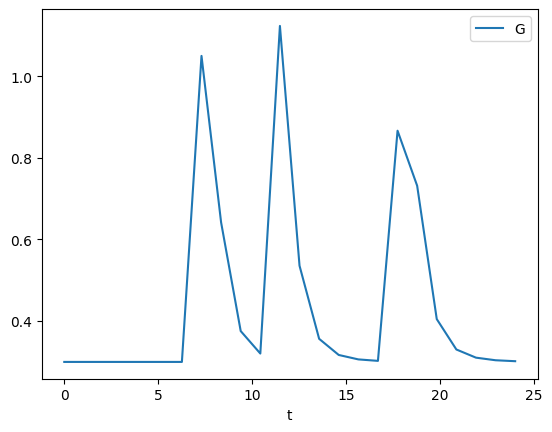

In [6]:
df.plot(x="t", y="G")

#### Endogenous currents


- **I_S** : Insulin secretion (endogenous)
- **I_E** : Effective Insulin (injected + endogenous)
- **L** : ("Light") Photoperiod conveyed via hypothalamus

<Axes: xlabel='t'>

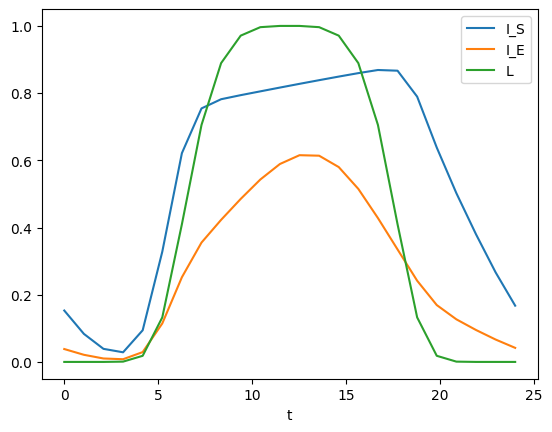

In [7]:
df.plot(x="t", y=["I_S", "I_E", "L", ])

## Visualize using pfun tools

(<Figure size 1400x1000 with 2 Axes>,
 array([<Axes: xlabel='Time (24-hours)'>, <Axes: xlabel='Time (24-hours)'>],
       dtype=object))

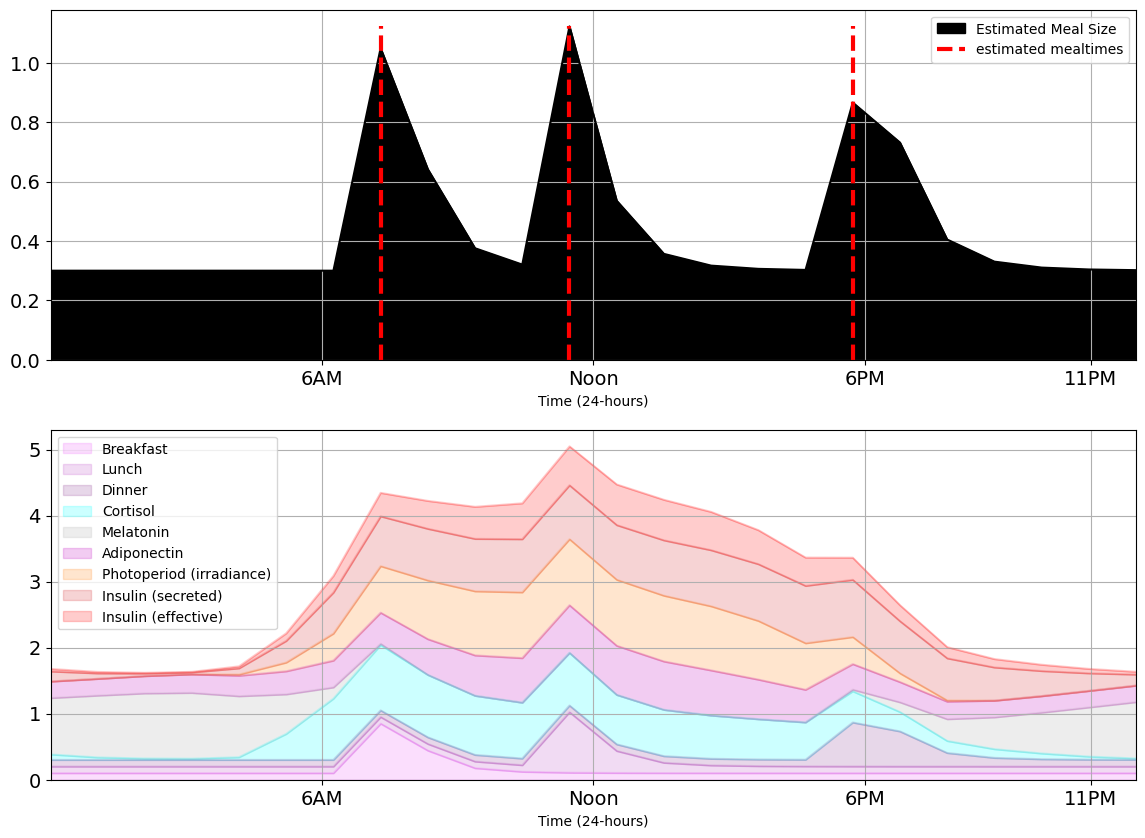

In [9]:
from pfun_cma_model.engine.cma_plot import CMAPlotConfig

cma_plot = CMAPlotConfig()

cma_plot.plot(soln=df, as_blob=False)